### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

> Independent variable is `congruency condition`. `congruent` or `incongruent` words.

> Dependent variable is `time`


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Null hypothesis** : The congruent group and the incongruent group have same population mean time for reading colors.

**Alternative hypothesis** : The congruent group and the incongruent group have different population mean time for reading colors.

μi : The population mean of incongruent response times<br>
μc : The population mean of congruent response times

$$ H_0: μ_{i} = μ_{c} $$
$$ H_1: μ_{i} ≠ μ_{c} $$


- We have a dependent variable that is measured. `time`
- We also have one categorical variable that has only two related groups.

So I will use *Dependent T-Test*. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

df = pd.read_csv('./stroopdata.csv')
df.head()


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [65]:
df.shape

(24, 2)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


Let's look for mean of the groups

In [67]:
print('Mean of the time of Congruent : {}'.format(str(df.Congruent.mean())))

Mean of the time of Congruent : 14.051125000000004


In [68]:
print('Mean of the time of Incongruent : {}'.format(str(df.Incongruent.mean())))

Mean of the time of Incongruent : 22.01591666666667


But, Mean can easily affect with outliers. Lets look for median of groups

In [69]:
print('Median of the time of Congruent : {}'.format(str(df.Congruent.median())))

Median of the time of Congruent : 14.3565


In [70]:
print('Median of the time of Incongruent : {}'.format(str(df.Incongruent.median())))

Median of the time of Incongruent : 21.0175


Lets look for standart deviation of results

In [71]:
print('Std of the time of Congruent : {}'.format(str(df.Congruent.std())))

Std of the time of Congruent : 3.559357957645195


In [72]:
print('Std of the time of Incongruent : {}'.format(str(df.Incongruent.std())))

Std of the time of Incongruent : 4.797057122469138


Merge the results on a table, to clearly see the differences

In [73]:
results_df = pd.DataFrame(columns=['mean', 'median', 'std'])

In [74]:
results_df['mean'] = df.mean()
results_df['median'] = df.median()
results_df['std'] = df.std()

In [75]:
results_df

,mean,median,std
Congruent,14.051125,14.3565,3.559358
Incongruent,22.015917,21.0175,4.797057


We can see, Standart Deviation of Incongruent is larger than Congruent. We can assume that Incongruent has some outliers. With visual charts like boxplot we can easiyle spot that difference.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

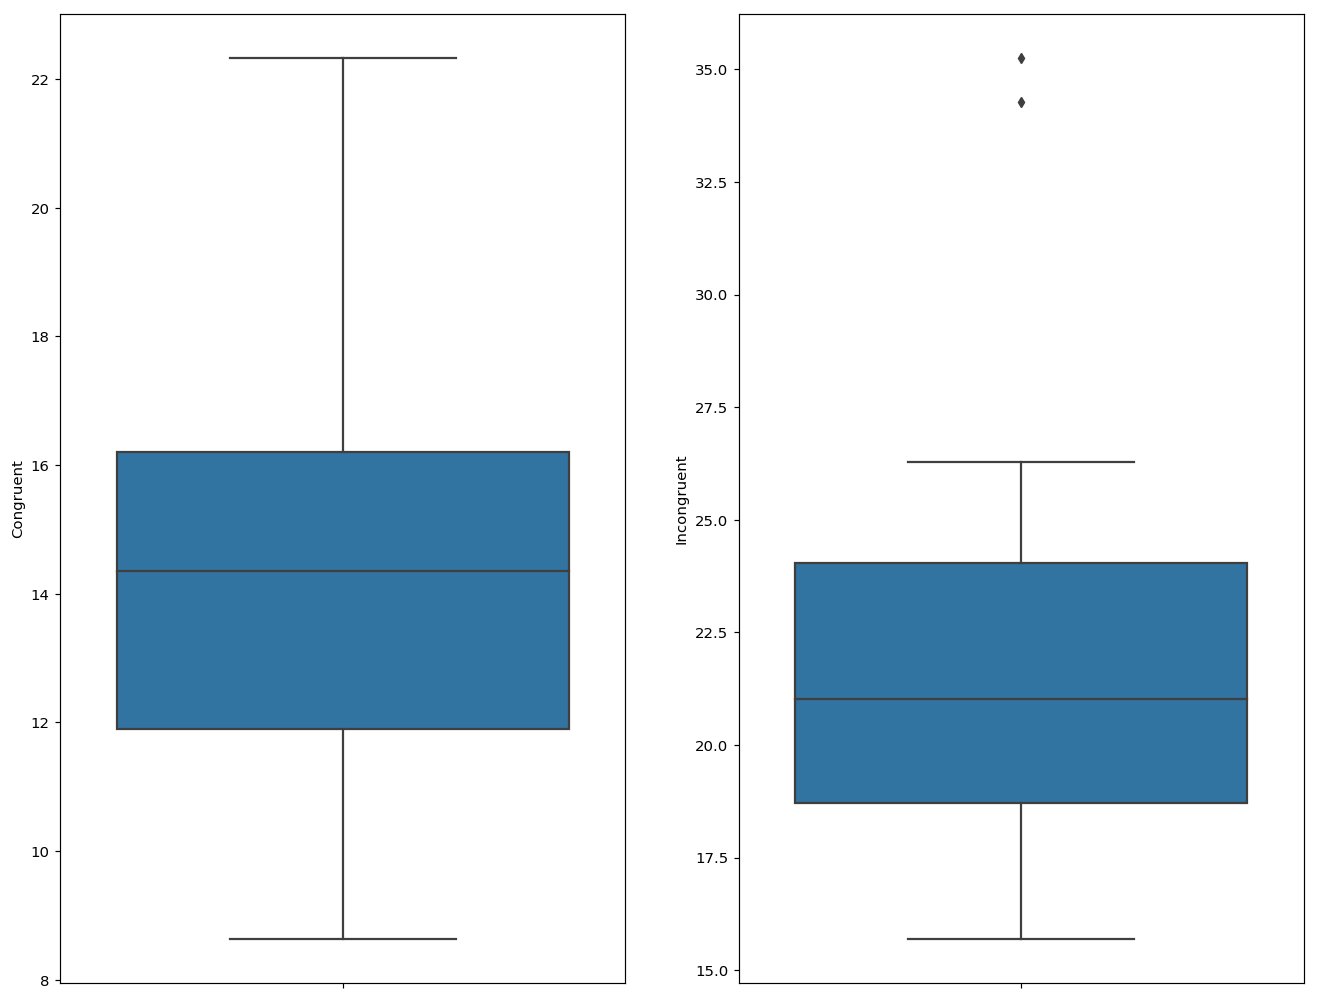

In [76]:
fig, axes =plt.subplots(1,2, figsize=(15,12), dpi = 107)

sns.boxplot(  x= 'Congruent', data=df,  orient='v' , ax=axes[0])
sns.boxplot(  x= 'Incongruent', data=df,  orient='v' , ax=axes[1])

The boxplot clearly displays significant difference in the median of the `Response Time` for two samples.

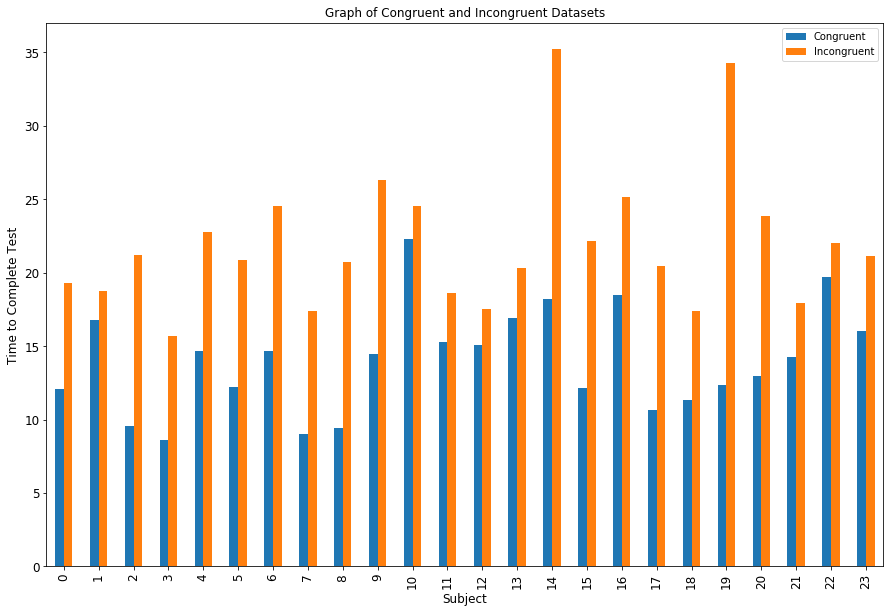

In [77]:
ax = df.plot(kind='bar', title ="Graph of Congruent and Incongruent Datasets", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Subject", fontsize=12)
ax.set_ylabel("Time to Complete Test", fontsize=12)
plt.show()

We can clearly see in the graph that all congruent's completion time is less than all incongruent.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [78]:
n = len(df)
print("n = {}".format(str(n)))
degrees_of_freedom = n - 1
print("df = {}".format(str(degrees_of_freedom)))

n = 24
df = 23


In [79]:
from scipy import stats
alpha = 0.05
t_critical = stats.t.ppf(alpha, degrees_of_freedom)
print("t-critical from t-table : {}".format(str(critical_value)))

t-critical from t-table : -1.71387152775


In [80]:
t_statistic, p_value = stats.ttest_rel(df.Congruent, df.Incongruent)
print("t_statistic: {}".format(str(t_statistic)))
print("p_value: {}".format(str(p_value)))

t_statistic: -8.02070694411
p_value: 4.10300058571e-08


> 8.0207 > 1.7139

`t-statistic` is greater than `t-critical`. So we can reject the null hypothesis.

Which is matches with my expectations and my results. After taking the online test, we can see that the second condition took longer to complete.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--

**Resources**

- https://docs.scipy.org/doc/scipy/reference/stats.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
- http://pytolearn.csd.auth.gr/d1-hyptest/12/ttest-paired.html
- https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide-3.php
- https://books.google.com.tr/books?id=C-dDDwAAQBAJ&pg=PA20&lpg=PA20&dq=stats.t.ppf&source=bl&ots=j15v-vn--s&sig=JIx2u45Wj-lVsuq2DcbZTUUwNN8&hl=tr&sa=X&ved=2ahUKEwif4r7ou-3cAhUvxaYKHVE7AssQ6AEwDnoECAMQAQ#v=onepage&q=stats.t.ppf%20nedir&f=false

In [81]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Test a Perceptual Phenomenon.ipynb'])

0